In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.metrics import fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/train_dataset_final1.csv')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [ ]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [ ]:
df['sex'].value_counts()

,count
sex,
1,15252
0,9995


In [ ]:
df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
5,253
4,116
6,44
0,14


In [ ]:
df['education']=df['education'].replace([5,6,0],4)
df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
4,427


In [ ]:
df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,273
0,53


In [ ]:
df['marriage']=df['marriage'].replace([0],3)
df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,326


In [ ]:
df.drop('Customer_ID',axis=1,inplace=True)

In [ ]:
df.shape

(25247, 26)

In [ ]:
for col in df.columns:
  print(f"{col} : {df[col].dtype}")

marriage : int64
sex : int64
education : int64
LIMIT_BAL : int64
age : float64
pay_0 : int64
pay_2 : int64
pay_3 : int64
pay_4 : int64
pay_5 : int64
pay_6 : int64
Bill_amt1 : float64
Bill_amt2 : float64
Bill_amt3 : float64
Bill_amt4 : float64
Bill_amt5 : float64
Bill_amt6 : float64
pay_amt1 : float64
pay_amt2 : float64
pay_amt3 : float64
pay_amt4 : float64
pay_amt5 : float64
pay_amt6 : float64
AVG_Bill_amt : float64
PAY_TO_BILL_ratio : float64
next_month_default : int64


In [ ]:
for col in df.columns:
  print(f"{col} : {df[col].isnull().sum()}")

marriage : 0
sex : 0
education : 0
LIMIT_BAL : 0
age : 126
pay_0 : 0
pay_2 : 0
pay_3 : 0
pay_4 : 0
pay_5 : 0
pay_6 : 0
Bill_amt1 : 0
Bill_amt2 : 0
Bill_amt3 : 0
Bill_amt4 : 0
Bill_amt5 : 0
Bill_amt6 : 0
pay_amt1 : 0
pay_amt2 : 0
pay_amt3 : 0
pay_amt4 : 0
pay_amt5 : 0
pay_amt6 : 0
AVG_Bill_amt : 0
PAY_TO_BILL_ratio : 0
next_month_default : 0


In [ ]:
df['education'].value_counts()

,count
education,
2,11717
1,8988
3,4115
4,427


In [ ]:
df['age']=df['age'].fillna(df['age'].mean())

In [ ]:
for col in df.columns:
  print(f"{col} : {df[col].isnull().sum()}")

marriage : 0
sex : 0
education : 0
LIMIT_BAL : 0
age : 0
pay_0 : 0
pay_2 : 0
pay_3 : 0
pay_4 : 0
pay_5 : 0
pay_6 : 0
Bill_amt1 : 0
Bill_amt2 : 0
Bill_amt3 : 0
Bill_amt4 : 0
Bill_amt5 : 0
Bill_amt6 : 0
pay_amt1 : 0
pay_amt2 : 0
pay_amt3 : 0
pay_amt4 : 0
pay_amt5 : 0
pay_amt6 : 0
AVG_Bill_amt : 0
PAY_TO_BILL_ratio : 0
next_month_default : 0


In [ ]:
df['next_month_default'].value_counts()

,count
next_month_default,
0,20440
1,4807


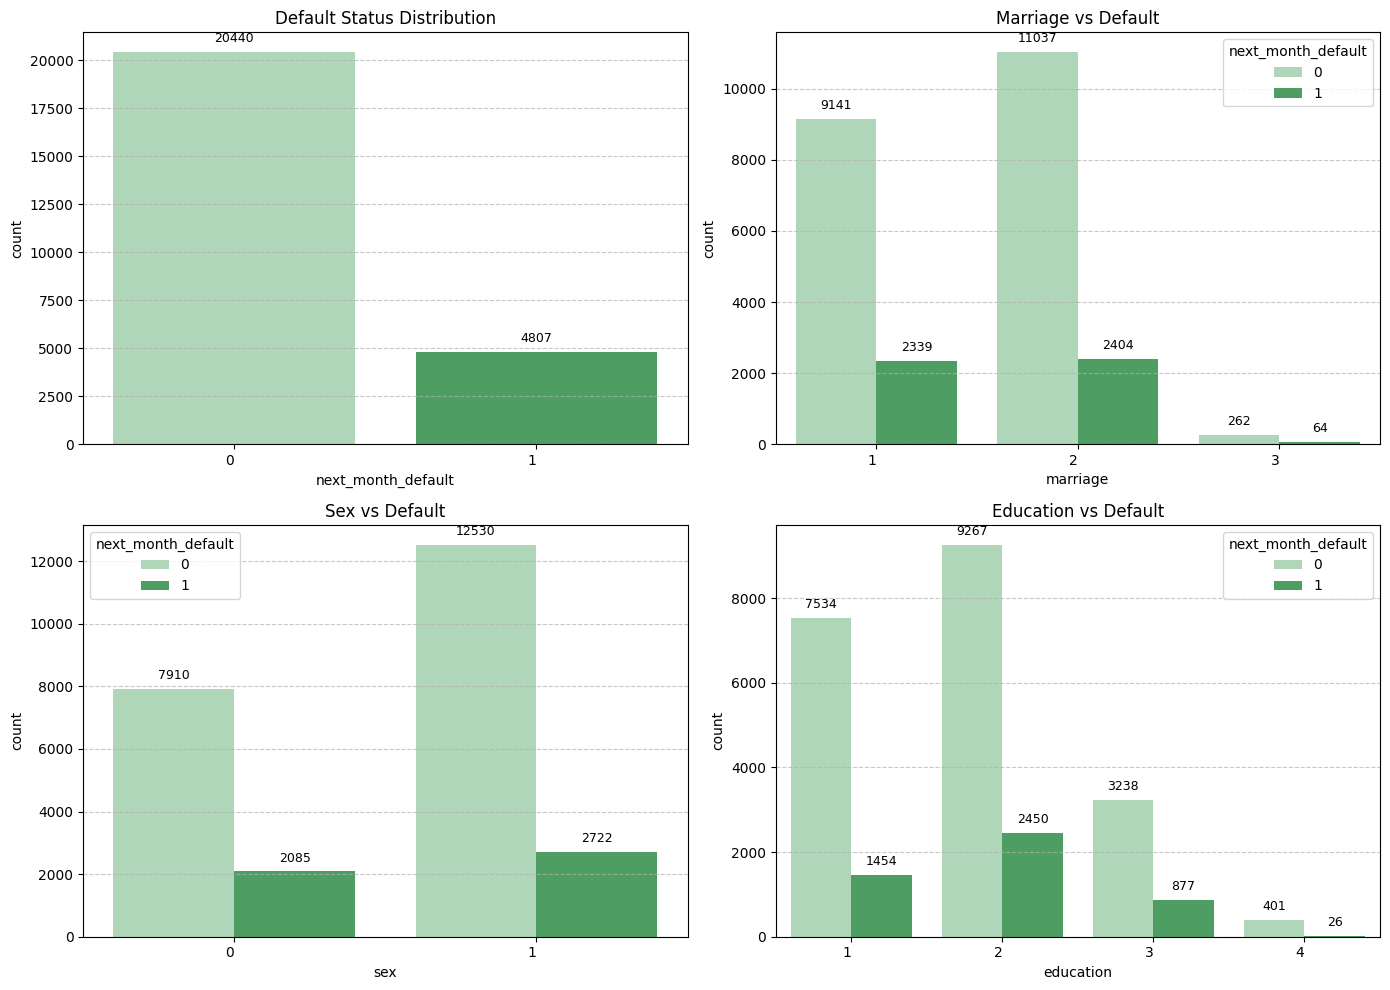

In [ ]:
green_palette = ['#a8ddb5', '#41ab5d']
plot_features = ['next_month_default', 'marriage', 'sex', 'education']
titles = ['Default Status Distribution', 'Marriage vs Default', 'Sex vs Default', 'Education vs Default']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(plot_features):
    ax = axes[i]

    if col == 'next_month_default':
        chart = sns.countplot(x=col, data=df, ax=ax, palette=green_palette)
    else:
        chart = sns.countplot(x=col, hue='next_month_default', data=df, ax=ax, dodge=True, palette=green_palette)

    chart.set_title(titles[i])
    chart.set_xticklabels(chart.get_xticklabels(), ha='right')
    chart.grid(axis='y', linestyle='--', alpha=0.7)
    for p in chart.patches:
        height = p.get_height()
        if height > 0:
            chart.annotate(f'{int(height)}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom',
                           fontsize=9, color='black', xytext=(0, 5),
                           textcoords='offset points')

plt.tight_layout()
plt.show()


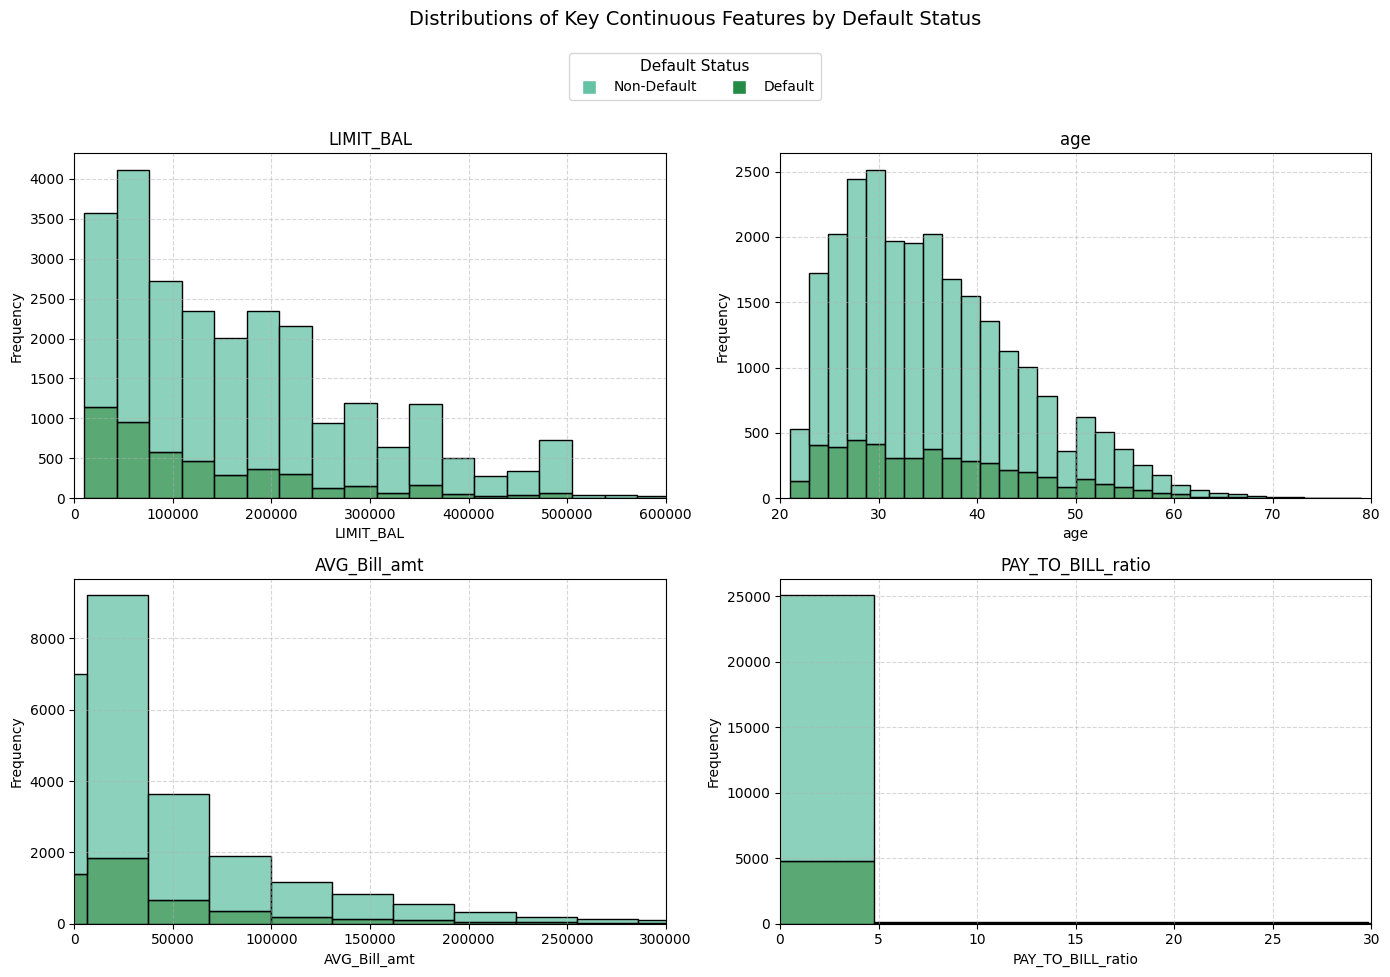

In [ ]:
green_palette = ['#66c2a4', '#238b45']
cont_features = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']
x_limits = {
    'LIMIT_BAL': (0, 600000),
    'age': (20, 80),
    'AVG_Bill_amt': (0, 300000),
    'PAY_TO_BILL_ratio': (0, 30),
}
fig, axes = plt.subplots(2, 2, figsize=(14, 9))
axes = axes.flatten()

for i, col in enumerate(cont_features):
    sns.histplot(
        data=df,
        x=col,
        hue='next_month_default',
        palette=green_palette,
        bins=30,
        multiple='stack',
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(x_limits[col])
    axes[i].grid(True, linestyle='--', alpha=0.5)
custom_handles = [
    plt.Line2D([0], [0], marker='s', color='w', label='Non-Default', markerfacecolor=green_palette[0], markersize=10),
    plt.Line2D([0], [0], marker='s', color='w', label='Default', markerfacecolor=green_palette[1], markersize=10)
]
fig.legend(
    handles=custom_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.04),
    ncol=2,
    title='Default Status',
    fontsize=10,
    title_fontsize=11
)

fig.suptitle("Distributions of Key Continuous Features by Default Status", fontsize=14, y=1.08)
plt.tight_layout()
plt.show()


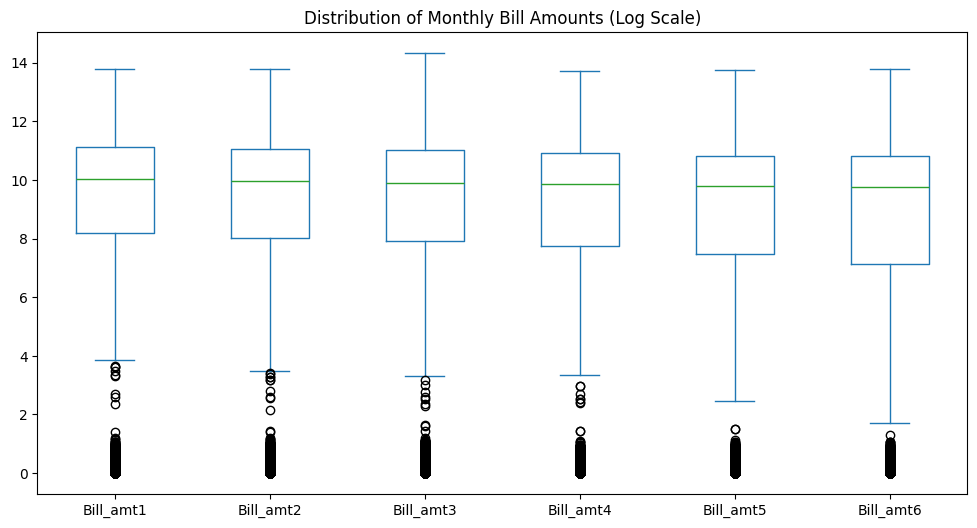

In [ ]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
df[bill_cols] = df[bill_cols].apply(lambda x: np.log1p(x))
df[bill_cols].plot(kind='box', figsize=(12,6), title='Distribution of Monthly Bill Amounts (Log Scale)')
plt.show()

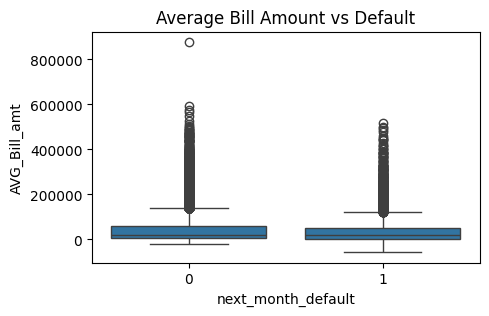

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(x='next_month_default', y='AVG_Bill_amt', data=df)
plt.title('Average Bill Amount vs Default')
plt.show()

In [ ]:
df.columns

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

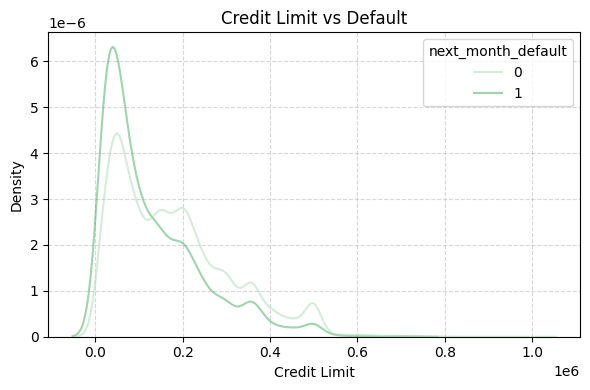

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
green_palette = ['#a8ddb5', '#41ab5d']

plt.figure(figsize=(6, 4))

sns.kdeplot(
    data=df,
    x='LIMIT_BAL',
    hue='next_month_default',
    common_norm=False,
    palette=green_palette,
    alpha=0.5
)

plt.title('Credit Limit vs Default', fontsize=12)
plt.xlabel('Credit Limit')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
def engineer_credit_features(df):
    import numpy as np

    pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
    bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
    pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]

    # Credit utilization features
    df['credit_utilization_ratio'] = df['AVG_Bill_amt'] / (df['LIMIT_BAL'] + 1e-5)
    df['max_monthly_utilization'] = df[bill_cols].max(axis=1) / (df['LIMIT_BAL'] + 1e-5)

    # Delinquency features
    df['num_delinquent_months'] = df[pay_cols].apply(lambda x: sum(x > 0), axis=1)
    df['max_delinquency'] = df[pay_cols].max(axis=1)
    df['avg_delinquency'] = df[pay_cols].mean(axis=1)
    df['ever_delinquent'] = df['num_delinquent_months'].apply(lambda x: 1 if x > 0 else 0)
    df['delinquency_trend'] = df['pay_0'] - df['pay_6']

    # Payment behavior features
    df['total_bill_amt'] = df[bill_cols].sum(axis=1)
    df['total_pay_amt'] = df[pay_amt_cols].sum(axis=1)
    df['avg_pay_amt'] = df[pay_amt_cols].mean(axis=1)

    df['underpaid_months'] = sum(df[f'pay_amt{i}'] < df[f'Bill_amt{i}'] for i in range(1, 7))
    df['overpaid_months'] = sum(df[f'pay_amt{i}'] > df[f'Bill_amt{i}'] for i in range(1, 7))

    # Volatility features
    df['bill_amt_std'] = df[bill_cols].std(axis=1)
    df['pay_amt_std'] = df[pay_amt_cols].std(axis=1)
    df['bill_amt_range'] = df[bill_cols].max(axis=1) - df[bill_cols].min(axis=1)
    df['pay_amt_range'] = df[pay_amt_cols].max(axis=1) - df[pay_amt_cols].min(axis=1)

    # Discipline indicators
    df['zero_spending_months'] = sum(df[f'Bill_amt{i}'] == 0 for i in range(1, 7))
    df['zero_payment_months'] = sum(df[f'pay_amt{i}'] == 0 for i in range(1, 7))
    df['fully_paid_months'] = sum(df[f'pay_amt{i}'] >= df[f'Bill_amt{i}'] for i in range(1, 7))

    return df

In [ ]:
df = engineer_credit_features(df)

In [ ]:
def plot_feature_group_with_hue(df, features, title, target_col='default', n_cols=2):
    green_palette = ['#66c2a4', '#238b45']
    sns.set(style="whitegrid")
    n_rows = -(-len(features) // n_cols)
    plt.figure(figsize=(n_cols * 6, n_rows * 4))
    for i, col in enumerate(features, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data=df, x=col, hue=target_col, palette=green_palette, kde=True, bins=30, element='step')
        plt.title(col.replace('_', ' ').title())
        plt.xlabel(col)
        plt.ylabel("Frequency")
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


def plot_all_engineered_groups_with_hue(df, target_col='default'):
    credit_utilization_features = [
        'credit_utilization_ratio', 'max_monthly_utilization'
    ]
    delinquency_features = [
        'num_delinquent_months', 'max_delinquency', 'avg_delinquency',
        'ever_delinquent', 'delinquency_trend'
    ]
    payment_behavior_features = [
        'total_bill_amt', 'total_pay_amt', 'avg_pay_amt',
        'underpaid_months', 'overpaid_months'
    ]
    volatility_features = [
        'bill_amt_std', 'pay_amt_std', 'bill_amt_range', 'pay_amt_range'
    ]
    discipline_features = [
        'zero_spending_months', 'zero_payment_months', 'fully_paid_months'
    ]

    plot_feature_group_with_hue(df, credit_utilization_features, "Credit Utilization Features", target_col)
    plot_feature_group_with_hue(df, delinquency_features, "Delinquency Features", target_col)
    plot_feature_group_with_hue(df, payment_behavior_features, "Payment Behavior Features", target_col)
    plot_feature_group_with_hue(df, volatility_features, "Volatility Features", target_col)
    plot_feature_group_with_hue(df, discipline_features, "Discipline Indicators", target_col)


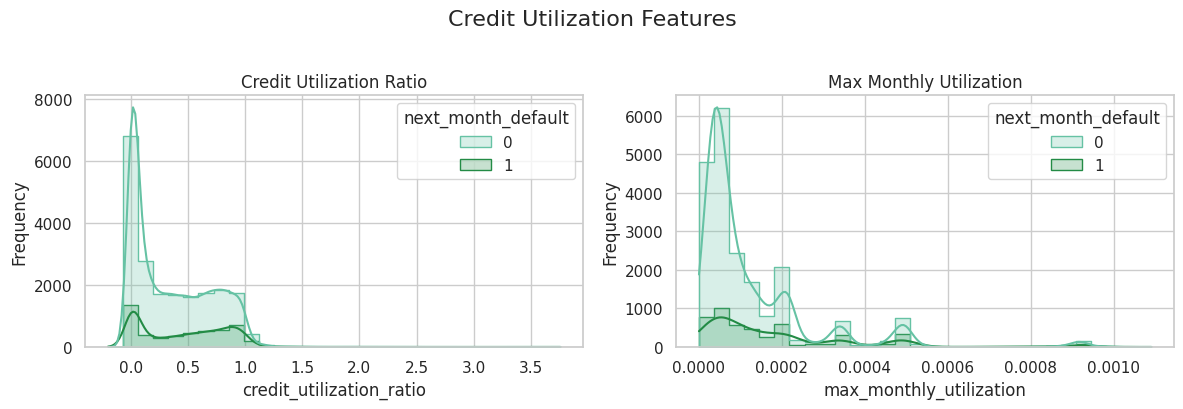

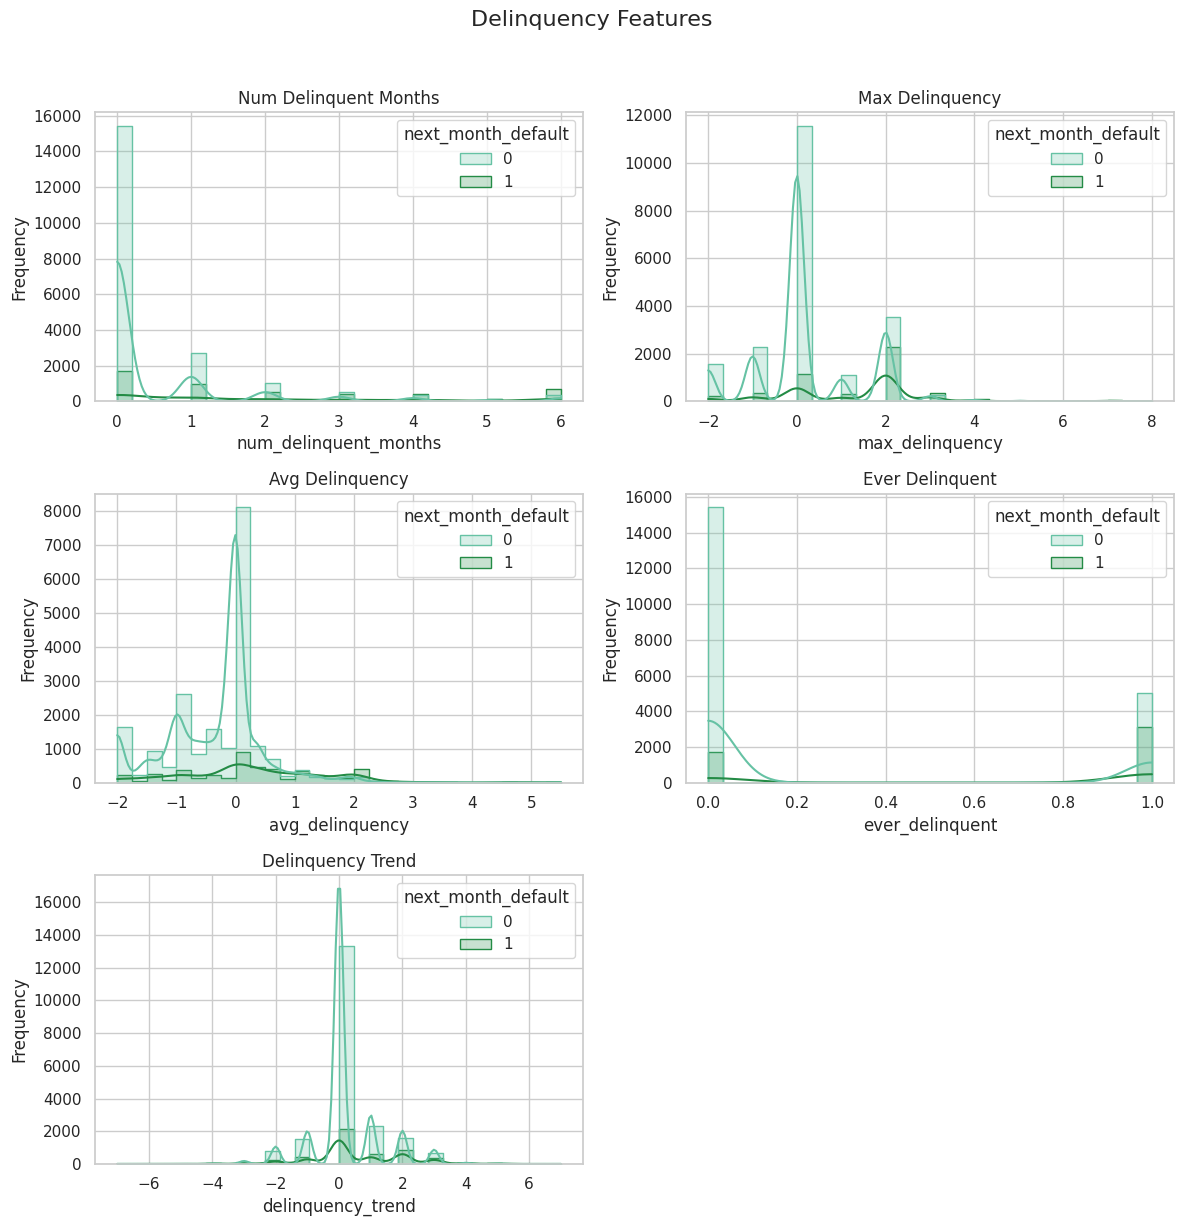

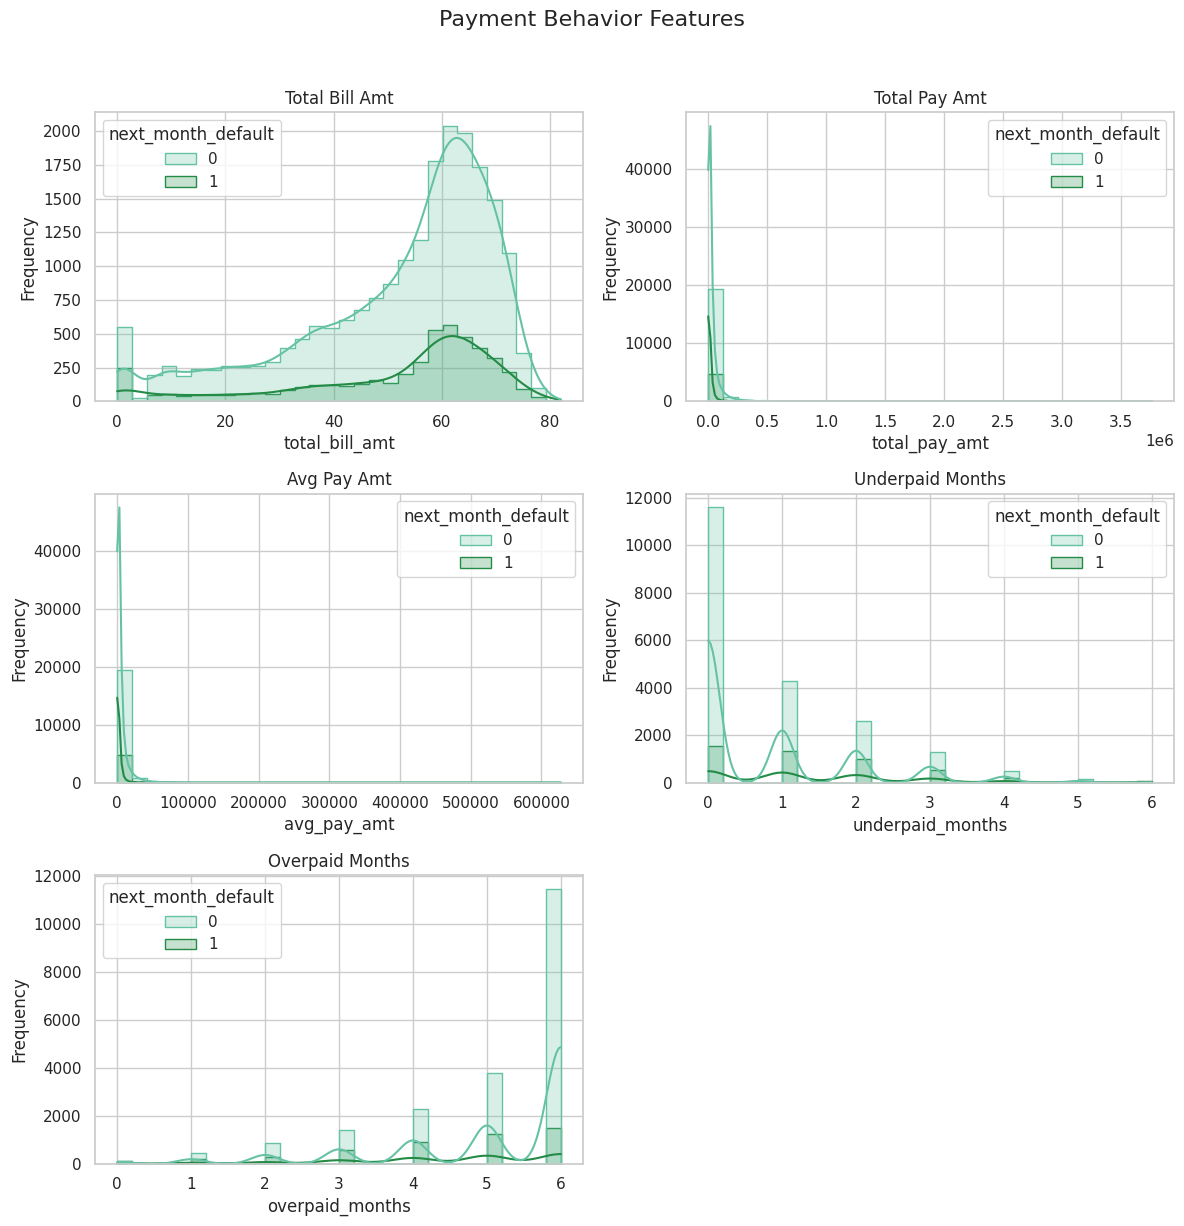

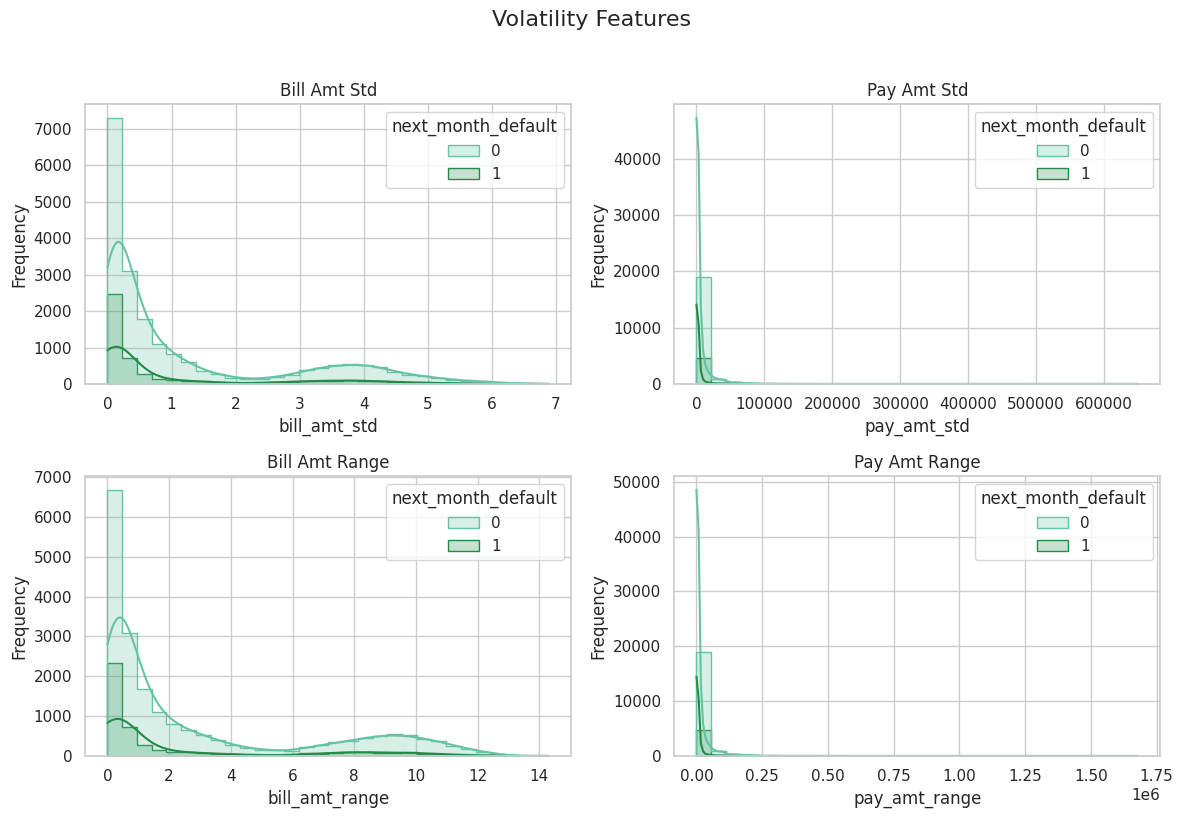

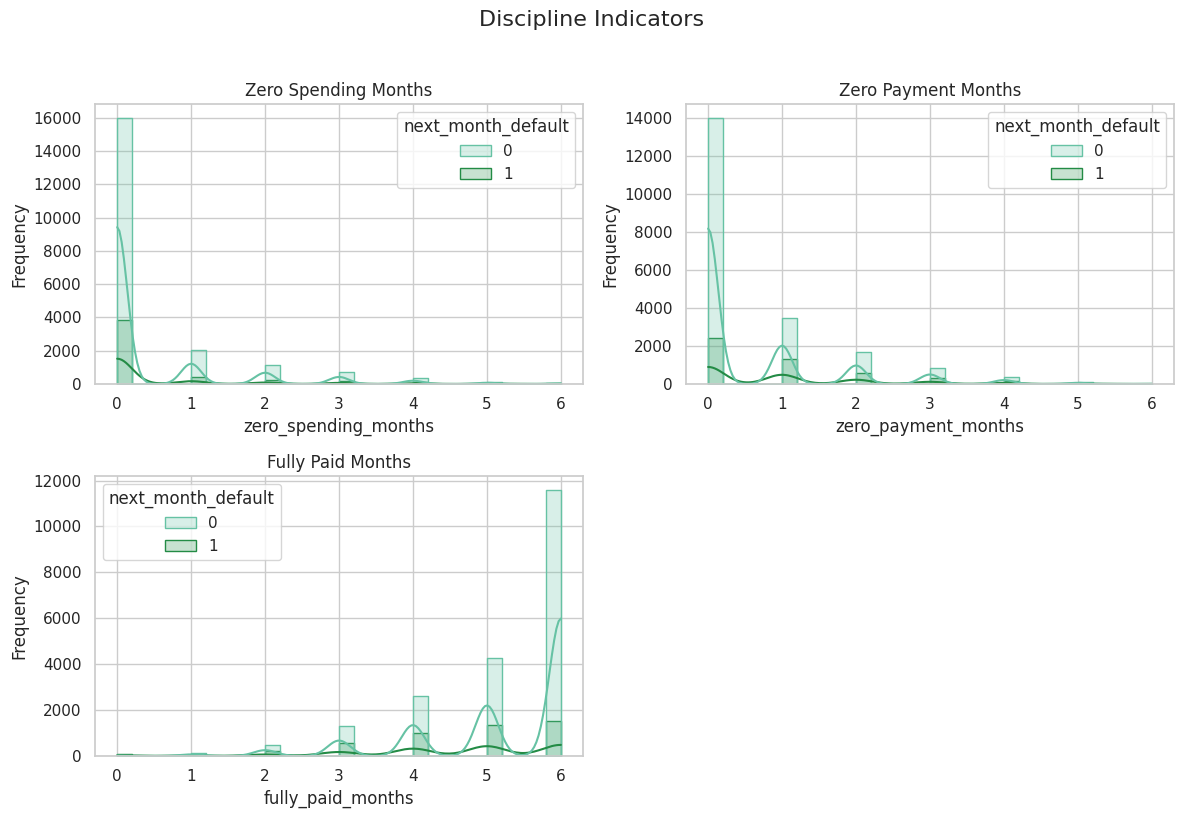

In [ ]:
df = engineer_credit_features(df)
plot_all_engineered_groups_with_hue(df, target_col='next_month_default')

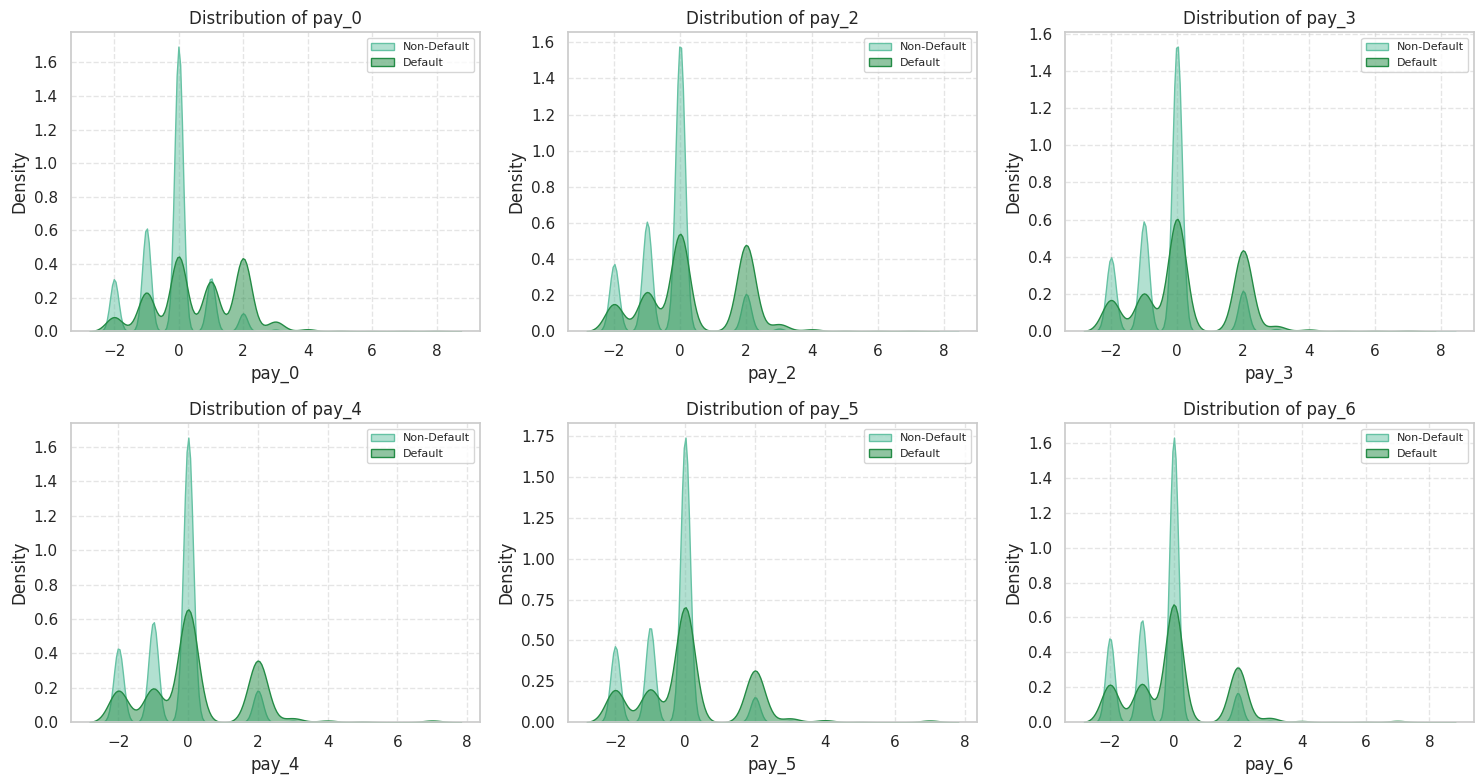

In [ ]:
green_palette = ['#66c2a4', '#238b45']
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Plot KDEs
for i, col in enumerate(pay_cols):
    ax = axes[i]
    sns.kdeplot(
        data=df[df['next_month_default'] == 0],
        x=col,
        fill=True,
        ax=ax,
        color=green_palette[0],
        alpha=0.5,
        label='Non-Default'
    )
    sns.kdeplot(
        data=df[df['next_month_default'] == 1],
        x=col,
        fill=True,
        ax=ax,
        color=green_palette[1],
        alpha=0.5,
        label='Default'
    )
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
df[bill_cols] = df[bill_cols].apply(lambda x: np.log1p(x))

In [ ]:
X=df.drop('next_month_default',axis=1)
y=df['next_month_default']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (20197, 44)
X_test shape: (5050, 44)
y_train shape: (20197,)
y_test shape: (5050,)


In [ ]:
categorical_features = ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
categorical_indices = [X.columns.get_loc(col) for col in categorical_features]
from imblearn.over_sampling import SMOTENC

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_resampled_np, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

X_train_resampled = pd.DataFrame(X_train_resampled_np, columns=X_train.columns)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = [col for col in X.columns if col not in categorical_features]
scaler = StandardScaler()
X_train_resampled[numeric_cols] = scaler.fit_transform(X_train_resampled[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_resampled,y_train_resampled)

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Logistic Regression Model Performance:
Accuracy: 0.8224

Confusion Matrix:
[[3732  356]
 [ 541  421]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4088
           1       0.54      0.44      0.48       962

    accuracy                           0.82      5050
   macro avg       0.71      0.68      0.69      5050
weighted avg       0.81      0.82      0.81      5050



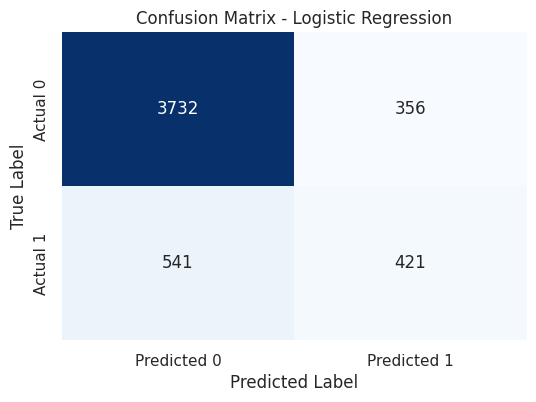

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

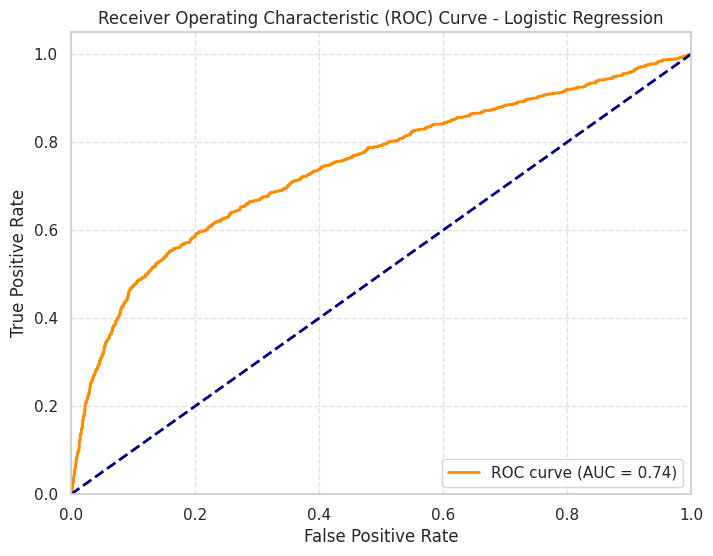

In [ ]:
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonal random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Max F2 Score: 0.5768
Threshold at Max F2 Score: 0.2424
Accuracy at Max F2 Score Threshold: 0.5719

Classification Report at Max F2 Threshold:
              precision    recall  f1-score   support

           0       0.91      0.52      0.66      4088
           1       0.28      0.79      0.41       962

    accuracy                           0.57      5050
   macro avg       0.60      0.65      0.54      5050
weighted avg       0.79      0.57      0.62      5050



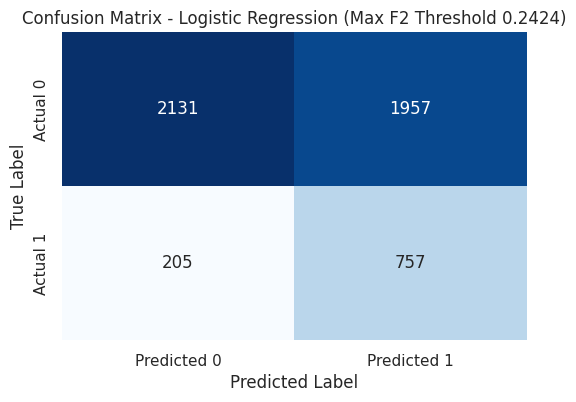

In [ ]:
y_prob = logistic_model.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0, 1, 100)

best_f2 = 0
best_threshold = 0
accuracy_at_best_f2 = 0
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    f2 = fbeta_score(y_test, y_pred_threshold, beta=2.0)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = threshold
        accuracy_at_best_f2 = accuracy_score(y_test, y_pred_threshold)

print(f"Max F2 Score: {best_f2:.4f}")
print(f"Threshold at Max F2 Score: {best_threshold:.4f}")
print(f"Accuracy at Max F2 Score Threshold: {accuracy_at_best_f2:.4f}")

y_pred_best_f2 = (y_prob >= best_threshold).astype(int)
print("\nClassification Report at Max F2 Threshold:")
print(classification_report(y_test, y_pred_best_f2))
conf_matrix_best_f2 = confusion_matrix(y_test, y_pred_best_f2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_f2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix - Logistic Regression (Max F2 Threshold {best_threshold:.4f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


XGBoost Model Performance (Default Threshold):
Accuracy: 0.8279

Confusion Matrix:
[[3821  267]
 [ 602  360]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4088
           1       0.57      0.37      0.45       962

    accuracy                           0.83      5050
   macro avg       0.72      0.65      0.68      5050
weighted avg       0.81      0.83      0.81      5050


AUC: 0.7592


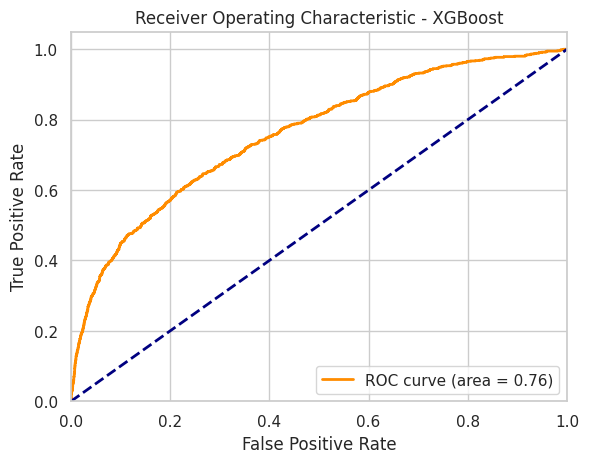

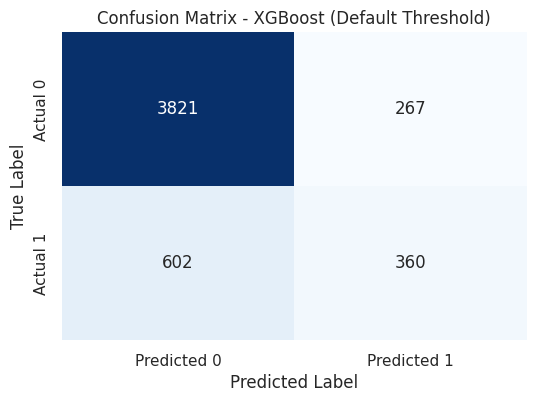

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Model Performance (Default Threshold):")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(class_report_xgb)

y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

print(f"\nAUC: {roc_auc_xgb:.4f}")
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.show()
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBoost (Default Threshold)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


XGBoost Optimal Threshold to Maximize F2-score: 0.0606
Maximum F2-score achieved: 0.5912

XGBoost Model Performance with F2-Optimized Threshold (0.0606):
Accuracy: 0.4463
F2 Score: 0.5912

Confusion Matrix:
[[1374 2714]
 [  82  880]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.34      0.50      4088
           1       0.24      0.91      0.39       962

    accuracy                           0.45      5050
   macro avg       0.59      0.63      0.44      5050
weighted avg       0.81      0.45      0.47      5050



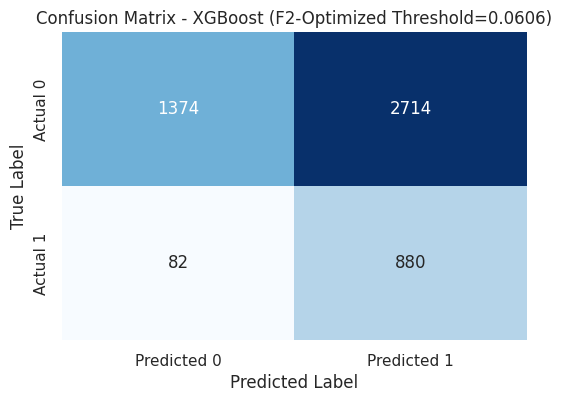

In [ ]:
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

best_f2 = 0
optimal_threshold_f2 = 0
thresholds_to_check = np.linspace(0, 1, 100)

for threshold in thresholds_to_check:
  y_pred_at_threshold = (y_pred_proba_xgb >= threshold).astype(int)
  f2_at_threshold = fbeta_score(y_test, y_pred_at_threshold, beta=2)

  if f2_at_threshold > best_f2:
    best_f2 = f2_at_threshold
    optimal_threshold_f2 = threshold

print(f"XGBoost Optimal Threshold to Maximize F2-score: {optimal_threshold_f2:.4f}")
print(f"Maximum F2-score achieved: {best_f2:.4f}")

y_pred_f2_optimized_xgb = (y_pred_proba_xgb >= optimal_threshold_f2).astype(int)
accuracy_f2_optimized_xgb = accuracy_score(y_test, y_pred_f2_optimized_xgb)
conf_matrix_f2_optimized_xgb = confusion_matrix(y_test, y_pred_f2_optimized_xgb)
class_report_f2_optimized_xgb = classification_report(y_test, y_pred_f2_optimized_xgb)
f2_score_optimized_xgb = fbeta_score(y_test, y_pred_f2_optimized_xgb, beta=2)

print(f"\nXGBoost Model Performance with F2-Optimized Threshold ({optimal_threshold_f2:.4f}):")
print(f"Accuracy: {accuracy_f2_optimized_xgb:.4f}")
print(f"F2 Score: {f2_score_optimized_xgb:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_f2_optimized_xgb)
print("\nClassification Report:")
print(class_report_f2_optimized_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_f2_optimized_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix - XGBoost (F2-Optimized Threshold={optimal_threshold_f2:.4f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Random Forest Model Performance:
Accuracy: 0.8301

Confusion Matrix:
[[3802  286]
 [ 572  390]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4088
           1       0.58      0.41      0.48       962

    accuracy                           0.83      5050
   macro avg       0.72      0.67      0.69      5050
weighted avg       0.81      0.83      0.82      5050

Random Forest AUC: 0.7752


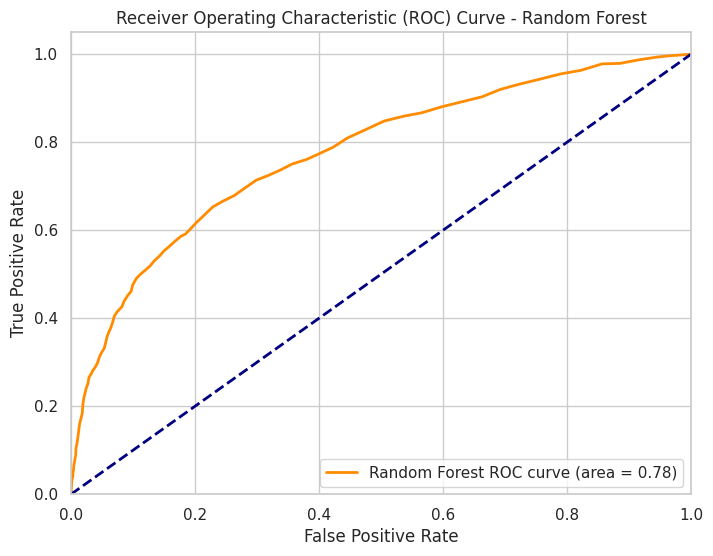

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

roc_auc_rf = auc(fpr_rf, tpr_rf)

print(f"Random Forest AUC: {roc_auc_rf:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

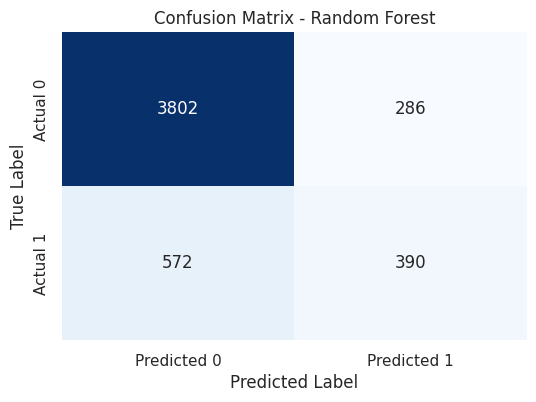

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_prob_rf)

f2_scores_rf = [fbeta_score(y_test, (y_prob_rf >= t).astype(int), beta=2) for t in thresholds_rf]
optimal_threshold_index_f2_rf = np.argmax(f2_scores_rf)
optimal_threshold_f2_rf = thresholds_rf[optimal_threshold_index_f2_rf]

print(f"Random Forest Optimal Threshold (maximizing F2 Score): {optimal_threshold_f2_rf:.4f}")
y_pred_optimal_f2_rf = (y_prob_rf >= optimal_threshold_f2_rf).astype(int)
accuracy_optimal_f2_rf = accuracy_score(y_test, y_pred_optimal_f2_rf)
conf_matrix_optimal_f2_rf = confusion_matrix(y_test, y_pred_optimal_f2_rf)
class_report_optimal_f2_rf = classification_report(y_test, y_pred_optimal_f2_rf)
f2_score_optimal_f2_rf = fbeta_score(y_test, y_pred_optimal_f2_rf, beta=2)

print(f"\nRandom Forest Model Performance (using Optimal F2 Threshold = {optimal_threshold_f2_rf:.4f}):")
print(f"Accuracy: {accuracy_optimal_f2_rf:.4f}")
print(f"F2 Score: {f2_score_optimal_f2_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_optimal_f2_rf)
print("\nClassification Report:")
print(class_report_optimal_f2_rf)

Random Forest Optimal Threshold (maximizing F2 Score): 0.1700

Random Forest Model Performance (using Optimal F2 Threshold = 0.1700):
Accuracy: 0.5622
F2 Score: 0.6063

Confusion Matrix:
[[2023 2065]
 [ 146  816]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.49      0.65      4088
           1       0.28      0.85      0.42       962

    accuracy                           0.56      5050
   macro avg       0.61      0.67      0.54      5050
weighted avg       0.81      0.56      0.60      5050



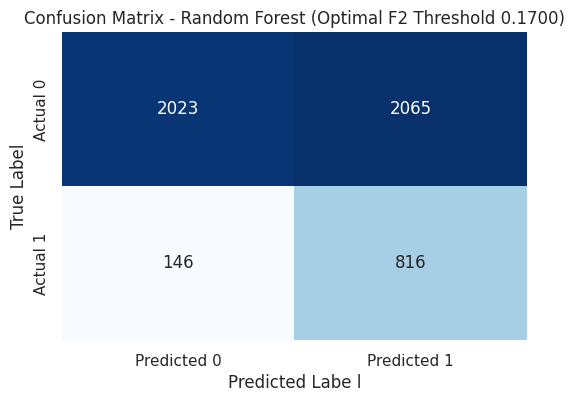

In [ ]:
# Optional: Visualize the confusion matrix with optimal F2 threshold
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_optimal_f2_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix - Random Forest (Optimal F2 Threshold {optimal_threshold_f2_rf:.4f})')
plt.xlabel('Predicted Labe l')
plt.ylabel('True Label')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTENC
from tensorflow.keras.utils import to_categorical
X = df.drop('next_month_default', axis=1)
y = df['next_month_default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Categorical features for SMOTENC
categorical_features = ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_features]

# SMOTENC
X_train_np = X_train.values
y_train_np = y_train.values
smote = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_np, y_train_np)

# Scaling numeric features
numeric_cols = X_train.columns.difference(categorical_features)
numeric_indices = [X_train.columns.get_loc(col) for col in numeric_cols]

scaler = StandardScaler()
X_train_resampled[:, numeric_indices] = scaler.fit_transform(X_train_resampled[:, numeric_indices])
X_test_np = X_test.values
X_test_np[:, numeric_indices] = scaler.transform(X_test_np[:, numeric_indices])
X_test_scaled = X_test_np


In [ ]:
# Define sequential features for LSTM
sequential_features = [f'Bill_amt{i}' for i in range(1, 7)] + \
                      [f'pay_amt{i}' for i in range(1, 7)] + \
                      ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Remaining = non-sequential
non_sequential_features = [col for col in X.columns if col not in sequential_features]

seq_idx = [X.columns.get_loc(col) for col in sequential_features]
non_seq_idx = [X.columns.get_loc(col) for col in non_sequential_features]


X_train_seq = X_train_resampled[:, seq_idx].reshape(-1, 1, len(seq_idx))
X_train_non_seq = X_train_resampled[:, non_seq_idx]

X_test_seq = X_test_scaled[:, seq_idx].reshape(-1, 1, len(seq_idx))
X_test_non_seq = X_test_scaled[:, non_seq_idx]

y_train_cat = to_categorical(y_train_resampled)
y_test_cat = to_categorical(y_test.values)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# LSTM input
seq_input = Input(shape=(1, len(seq_idx)), name='seq_input')
lstm_out = LSTM(64, return_sequences=False)(seq_input)
lstm_out = Dropout(0.3)(lstm_out)

# Dense input
non_seq_input = Input(shape=(len(non_seq_idx),), name='non_seq_input')
non_seq_out = Dense(32, activation='relu')(non_seq_input)
non_seq_out = Dropout(0.3)(non_seq_out)

# Merge
merged = concatenate([lstm_out, non_seq_out])
x = Dense(32, activation='relu')(merged)
x = Dropout(0.3)(x)
output = Dense(2, activation='softmax')(x)

# Model
model = Model(inputs=[seq_input, non_seq_input], outputs=output)
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    [X_train_seq, X_train_non_seq],
    y_train_cat,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
409/409 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6870 - loss: 0.6008 - val_accuracy: 0.5621 - val_loss: 0.7208
Epoch 2/50
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7488 - loss: 0.5321 - val_accuracy: 0.6721 - val_loss: 0.6220
Epoch 3/50
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7599 - loss: 0.5146 - val_accuracy: 0.6967 - val_loss: 0.5826
Epoch 4/50
409/409 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7719 - loss: 0.4921 - val_accuracy: 0.7081 - val_loss: 0.5641
Epoch 5/50
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7762 - loss: 0.4909 - val_accuracy: 0.7346 - val_loss: 0.5215
Epoch 6/50
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7904 - loss: 0.4711 - val_accuracy: 0.7525 - val_loss: 0.4736
Epoch 7/50
409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7909 - loss: 0.4680 - val_accuracy: 0.7624 - val_loss: 0.4788
Epoch 8/50
409/409 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7979 - loss: 0.4593 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score, roc_curve, auc, precision_score, recall_score


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8364
Precision: 0.6037
Recall: 0.4116
F2 Score: 0.4396


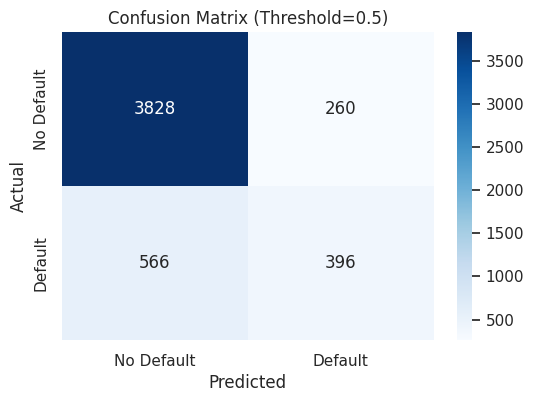

In [ ]:
y_pred_prob = model.predict([X_test_seq, X_test_non_seq])[:, 1]
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Metrics
f2 = fbeta_score(y_test, y_pred_class, beta=2)
acc = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F2 Score: {f2:.4f}")

# Confusion Matrix
conf = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(6,4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold=0.5)")
plt.show()


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network AUC: 0.7868


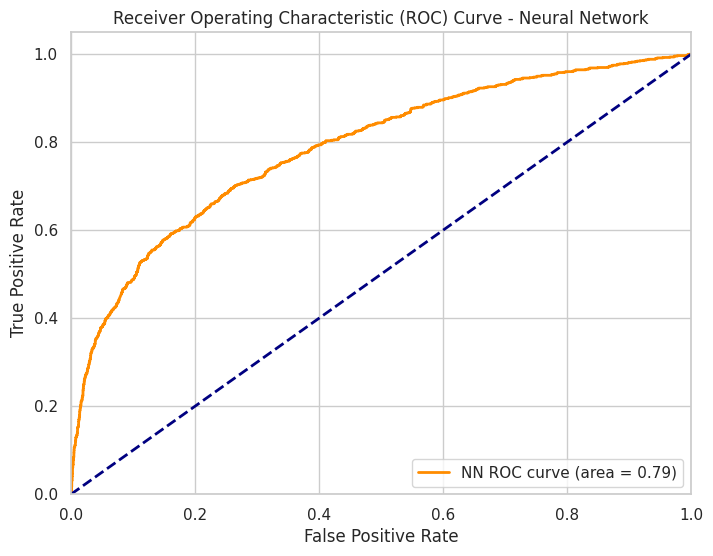

In [ ]:
y_pred_prob_nn = model.predict([X_test_seq, X_test_non_seq])[:, 1]
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

print(f"Neural Network AUC: {roc_auc_nn:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'NN ROC curve (area = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()



158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Optimal Threshold (maximizing F2 Score): 0.2030
Maximum F2 Score achieved: 0.6133

Neural Network Model Performance (using Optimal F2 Threshold = 0.2030):
Accuracy: 0.6297

Confusion Matrix:
[[2407 1681]
 [ 189  773]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.59      0.72      4088
           1       0.31      0.80      0.45       962

    accuracy                           0.63      5050
   macro avg       0.62      0.70      0.59      5050
weighted avg       0.81      0.63      0.67      5050



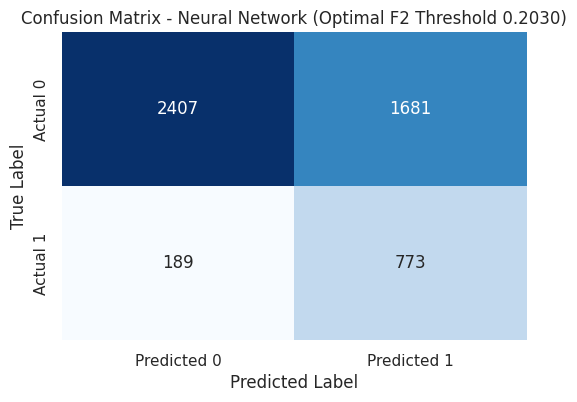

In [ ]:
y_pred_prob_nn = model.predict([X_test_seq, X_test_non_seq])[:, 1]

precision_nn, recall_nn, thresholds_nn = precision_recall_curve(y_test, y_pred_prob_nn)
f2_scores_nn = [fbeta_score(y_test, (y_pred_prob_nn >= t).astype(int), beta=2) for t in thresholds_nn]
optimal_threshold_index_f2_nn = np.argmax(f2_scores_nn)
optimal_threshold_f2_nn = thresholds_nn[optimal_threshold_index_f2_nn]
max_f2_nn = f2_scores_nn[optimal_threshold_index_f2_nn]

print(f"Neural Network Optimal Threshold (maximizing F2 Score): {optimal_threshold_f2_nn:.4f}")
print(f"Maximum F2 Score achieved: {max_f2_nn:.4f}")
y_pred_optimal_f2_nn = (y_pred_prob_nn >= optimal_threshold_f2_nn).astype(int)
accuracy_optimal_f2_nn = accuracy_score(y_test, y_pred_optimal_f2_nn)
conf_matrix_optimal_f2_nn = confusion_matrix(y_test, y_pred_optimal_f2_nn)
class_report_optimal_f2_nn = classification_report(y_test, y_pred_optimal_f2_nn)

print(f"\nNeural Network Model Performance (using Optimal F2 Threshold = {optimal_threshold_f2_nn:.4f}):")
print(f"Accuracy: {accuracy_optimal_f2_nn:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_optimal_f2_nn)
print("\nClassification Report:")
print(class_report_optimal_f2_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_optimal_f2_nn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix - Neural Network (Optimal F2 Threshold {optimal_threshold_f2_nn:.4f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
val = pd.read_csv('/content/validate_dataset_final.csv')
val.drop('Customer_ID', axis=1, inplace=True)
val.reset_index(drop=True, inplace=True)
X_val = val.copy()

In [ ]:
engineer_credit_features(X_val)

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,credit_utilization_ratio,max_monthly_utilization,num_delinquent_months,max_delinquency,avg_delinquency,ever_delinquent,delinquency_trend,total_bill_amt,total_pay_amt,avg_pay_amt,underpaid_months,overpaid_months,bill_amt_std,pay_amt_std,bill_amt_range,pay_amt_range,zero_spending_months,zero_payment_months,fully_paid_months
0,1,1,2,220000,32,0,0,0,0,0,0,28853.10,29144.77,27172.12,22066.47,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31,0.106620,0.132476,0,0,0.000000,0,0,140738.06,43208.62,7201.436667,5,1,5822.109123,11591.348629,13474.30,29368.91,0,0,1
1,2,0,1,350000,35,-1,-1,-1,0,0,0,4438.78,33718.18,14284.09,16425.68,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00,0.039030,0.096338,0,0,-0.500000,0,-1,81960.96,82330.60,13721.766667,4,2,11254.510849,14116.320363,31456.73,33656.91,0,0,2
2,2,1,1,310000,39,0,0,0,0,0,0,300500.53,265766.60,245457.90,249435.52,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04,0.832368,0.969357,0,0,0.000000,0,0,1548205.57,65527.58,10921.263333,6,0,22514.357169,1562.986833,59979.96,4000.20,0,0,0
3,1,0,2,20000,47,0,0,0,2,2,2,10628.45,11650.67,14252.14,13678.06,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08,0.666666,0.752008,3,2,1.000000,1,-2,79999.46,6500.18,1083.363333,6,0,1790.583297,1047.597389,4411.72,2799.81,0,0,0
4,2,1,2,500000,30,0,0,0,0,0,0,98617.77,73464.07,84740.39,72510.59,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23,0.154409,0.197236,0,0,0.000000,0,0,463228.27,105987.66,17664.610000,6,0,12414.655025,14101.872597,33776.47,35573.35,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,1,0,2,240000,51,0,0,0,0,0,0,98588.36,100544.66,102650.93,104748.89,106832.47,109060.11,3591.87,3718.80,3797.93,3820.66,3949.01,3976.22,103737.83,0.04,0.432241,0.454417,0,0,0.000000,0,0,622425.42,22854.49,3809.081667,6,0,3919.704851,143.600324,10471.75,384.35,0,0,0
5012,1,1,3,60000,33,0,0,0,0,0,0,57560.27,57765.42,49351.45,28547.74,29062.53,28862.41,2100.23,3000.32,1499.86,1499.82,1099.82,1100.18,41858.83,0.04,0.697647,0.962757,0,0,0.000000,0,0,251149.82,10300.23,1716.705000,6,0,14598.160979,727.938175,29217.68,1900.50,0,0,0
5013,1,0,1,290000,36,1,-2,-1,-1,0,0,0.00,0.00,567.27,16166.71,16725.60,17427.88,0.00,568.10,16165.93,1000.03,1000.05,1000.15,8481.17,0.39,0.029245,0.060096,1,1,-0.500000,1,1,50887.46,19734.26,3289.043333,3,2,9094.746541,6320.659050,17427.88,16165.93,2,1,3
5014,1,1,2,120000,28,0,0,0,0,0,0,103675.25,96833.58,78920.51,74309.81,75710.06,77502.18,3283.48,2999.75,5000.26,3000.13,2999.95,4000.04,84492.00,0.04,0.704100,0.863960,0,0,0.000000,0,0,506951.39,21283.61,3547.268333,6,0,12498.081654,810.489394,29365.44,2000.51,0,0,0


In [ ]:
sequential_features = [f'Bill_amt{i}' for i in range(1, 7)] + \
                      [f'pay_amt{i}' for i in range(1, 7)] + \
                      ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

non_sequential_features = [col for col in X_val.columns if col not in sequential_features]

# Column indices
seq_idx_val = [X_val.columns.get_loc(col) for col in sequential_features]
non_seq_idx_val = [X_val.columns.get_loc(col) for col in non_sequential_features]


In [ ]:
X_val_np = X_val.values
X_val_np[:, numeric_indices] = scaler.transform(X_val_np[:, numeric_indices]) # Use the scaler fitted on training data

X_val_seq = X_val_np[:, seq_idx_val].reshape(-1, 1, len(seq_idx_val))
X_val_non_seq = X_val_np[:, non_seq_idx_val]

# Get predictions with the optimal threshold from the Neural Network model
y_pred_prob_val = model.predict([X_val_seq, X_val_non_seq])[:, 1]
y_pred_optimal_f2_val = (y_pred_prob_val >= optimal_threshold_f2_nn).astype(int)

print(f"\nPredictions on Validation Data using Neural Network with Optimal F2 Threshold ({optimal_threshold_f2_nn:.4f}):")
print(y_pred_optimal_f2_val[:100]) # Print first 10 predictions as an example
print(f"\nTotal number of predictions: {len(y_pred_optimal_f2_val)}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Predictions on Validation Data using Neural Network with Optimal F2 Threshold (0.2030):
[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]

Total number of predictions: 5016


In [ ]:
import numpy as np
counts = np.bincount(y_pred_optimal_f2_val)
if len(counts) < 2:
    counts = np.pad(counts, (0, 2 - len(counts)), 'constant')

print(f"Count of 0s in y_pred_optimal_f2_val: {counts[0]}")
print(f"Count of 1s in y_pred_optimal_f2_val: {counts[1]}")

Count of 0s in y_pred_optimal_f2_val: 3818
Count of 1s in y_pred_optimal_f2_val: 1198


In [ ]:
submission_df = pd.DataFrame({'Customer_ID': range(1, len(y_pred_optimal_f2_val) + 1),
                              'next_month_default': y_pred_optimal_f2_val})
submission_df.to_csv('23118031_submission.csv', index=False)

print("Submission file '23118031_submission.csv' created successfully.")

Submission file '23118031_submission.csv' created successfully.
